## Importing Libraries

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_ta as ta
import mplfinance as mpf

## Importing Data

In [49]:
def get_data(ticker, interval='1d', period='10y'):
    data = yf.download(ticker, interval=interval, period=period, rounding=True, multi_level_index=False)
    data.drop(columns=['Close'], inplace=True)
    data.rename(columns={'Adj Close': 'Close'}, inplace=True)
    return data


df = get_data('BTC-USD', interval='1d', period='5y')

[*********************100%***********************]  1 of 1 completed


In [50]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-02-11,10208.24,10210.05,9729.33,9855.89,37648059389
2020-02-12,10326.05,10393.61,10202.39,10202.39,43444303830
2020-02-13,10214.38,10457.63,10116.16,10323.96,49356071373
2020-02-14,10312.12,10322.00,10125.53,10211.55,43338264162
2020-02-15,9889.42,10341.56,9874.43,10313.86,43865054831


## Generating Technical Indicators

In [ ]:
df.ta.rsi(length=14, append=True)
df.ta.macd(append=True)
df.ta.ema(length=20, append=True)
df.ta.ema(length=50, append=True)
df.ta.ema(length=200, append=True)
df.ta.percent_return(cumulative=True, append=True)

#df.tail()

,Close,High,Low,Open,Volume,RSI_14,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,EMA_20,EMA_50,EMA_200,CUMPCTRET_1,good_entry
Date,,,,,,,,,,,,,,
1970-01-01 00:00:00.000001804,NaN,NaN,NaN,NaN,NaN,47.167052,-860.324694,0.0,-860.324694,99177.752726,98414.654351,84033.978428,NaN,1.0
1970-01-01 00:00:00.000001805,NaN,NaN,NaN,NaN,NaN,47.167052,-860.324694,0.0,-860.324694,99177.752726,98414.654351,84033.978428,NaN,1.0
1970-01-01 00:00:00.000001812,NaN,NaN,NaN,NaN,NaN,47.167052,-860.324694,0.0,-860.324694,99177.752726,98414.654351,84033.978428,NaN,1.0
1970-01-01 00:00:00.000001813,NaN,NaN,NaN,NaN,NaN,47.167052,-860.324694,0.0,-860.324694,99177.752726,98414.654351,84033.978428,NaN,1.0
1970-01-01 00:00:00.000001818,NaN,NaN,NaN,NaN,NaN,47.167052,-860.324694,0.0,-860.324694,99177.752726,98414.654351,84033.978428,NaN,1.0


## Good/Bad entry points

In [52]:
df['good_entry'] = 0

lookahead = 5
threshold = 1.02

for i in range(len(df) - lookahead):
    future_max = df['Close'].iloc[i+1:i+1+lookahead].max()
    if future_max >= df['Close'].iloc[i] * threshold:
        df.at[i, 'good_entry'] = 1


#df.to_csv('btc.csv')

In [56]:
#help(df.ta)

# List of all indicators
df.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

## Price Chart

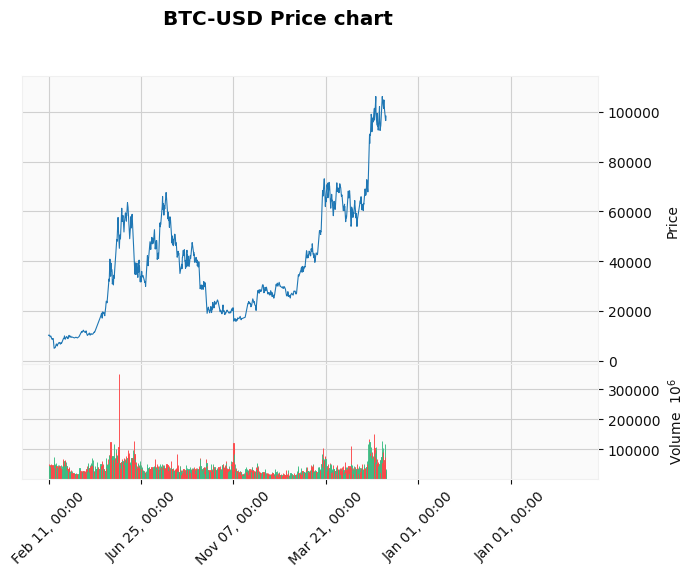

In [54]:
def price_chart(df, type='line', volume=True, style='yahoo', title='BTC-USD Price chart'):
    #df.columns = df.columns.droplevel(1)
    df.index = pd.to_datetime(df.index)
    mpf.plot(df, type=type, volume=volume, style=style, title=title)


price_chart(df)

## ML Model

In [ ]:
# scale the indicators
# train the model on older data entry points
# predict the future entry points on the newer data